## Non-linear dynamics to investigate genetic switches and oscillator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
from matplotlib.pyplot import figure

### A genetic toggle switch

Gardner and colleagues constructed a genetic switch using two repressors, each of which repressed the other. To be able to switch the genetic network from one state to the other, they used inducers – small molecules that induce gene expression. The inducers inhibit the action of the repressors because a repressor bound by an inducer is unable to bind to DNA. If the two repressors are u and v and Iu is the inducer that binds to u and Iv is the inducer that binds to v, then we can model the system as

\begin{equation*}
\frac{du}{dt}=-u+ \frac{(a_{u})}{1+  (\frac{v}{(1+ \frac{I_{v}}{K})^n})^b}
\end{equation*}

\begin{equation*}
\frac{dv}{dt}=-v+ \frac{(a_{v})}{1+  (\frac{u}{(1+ \frac{I_{u}}{K})^n})^b}
\end{equation*}

where $a_{u}$ is the maximum rate of expression of u and $a_{v}$ is the maximum rate of expression of *v*. The binding affinity of an inducer molecule to a repressor is given by *K*, and *b* and *n* are Hill numbers: *b* describes the cooperativity of repression and *n* describes the cooperativity of inducer binding to repressors. The degradation rates of *u* and *v* are assumed equal and set the unit of time (and so are both one).

**Question 1.1**
A true switch should exhibit history-dependent behaviour. Gardner and colleagues demonstrated such hysteresis by applying a series of inducers to their genetic construct. We will repeat this experiment with the model. Write some code to simulate the dynamics of u and v using odeint. You will need to create a function that returns du∕dt and dv∕dt given u and v and t. As we will vary the concentration of inducers, the function should also take the concentrations of the inducers as inputs. Let au=10, av=9, K=3, and both Hill numbers equal 2.

In [2]:
au = 10
av = 9
K = 3 
n = 2
b = 2 
def genetic_switch(y, t, params):
    Iv, Iu = params
    u, v = y
    dydt= np.empty(len(y))
    dydt[0]= -u + au/(1+(v/(1+Iv/K)**n)**b)
    dydt[1]= -v + av/(1+(u/(1+Iu/K)**n)**b)
    return dydt

**Question 1.2**
Starting with u=v=0, simulate the application of Iu for 50 time units (set Iu=100 and Iv=0), then remove Iu for another 50 time units. Following this removal, apply Iv for 50 time units (set Iu=0 and Iv=100) and then remove Iv for another 50 time units. You will need to call odeint four times and use the final values of u and v from the last call to odeint as the inital values for the current call to odeint. Plot your results (remembering to use show() to view the figure). Do you see hysteresis (history-dependent behaviour)? Why? Change both Hill numbers to 1. Rerun the experiment and explain what you observe.

In [3]:
u = 0
v = 0

In [4]:
t= np.linspace(0, 50, 50)
#application of Iu for 50 time units (set Iu=100 and Iv=0)
params = np.array([0, 100])
# u,v =y
yi_1= np.array([0, 0])
y1= odeint(genetic_switch, yi_1, t, args= (params,))
#remove Iu for another 50 time units
params = np.array([0, 0])
yi_2= y1[49]
y2= odeint(genetic_switch, yi_2, t, args= (params,))
#Iv for 50 time units (set Iu=0 and Iv=100)
params = np.array([100, 0])
yi_3= y2[49]
y3= odeint(genetic_switch, yi_3, t, args= (params,))
#remove Iv for another 50 time units. 
params = np.array([0, 0])
yi_4= y3[49]
y4= odeint(genetic_switch, yi_4, t, args= (params,))

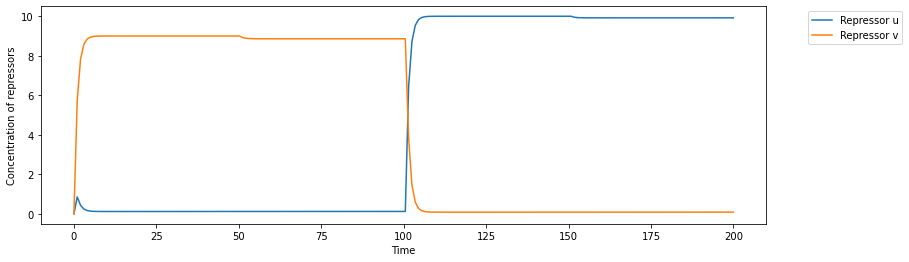

In [5]:
Y1 = np.concatenate((y1[:,0], y2[:,0], y3[:,0], y4[:,0]), axis=0)
Y2 = np.concatenate((y1[:,1], y2[:,1], y3[:,1], y4[:,1]), axis=0)
t_full= np.linspace(0, 200, 200)
plt.figure(figsize=(13,4)) 
plt.plot(t_full, Y1, label="Repressor u")
plt.plot(t_full, Y2, label="Repressor v")
plt.xlabel("Time")
plt.ylabel("Concentration of repressors")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

**Explanation**

According to this plot, as the concentration of inducer $I_{u}$ is increased from 0 to a high value (100) between t0 and t50, the concentration of repressor v jump to its steady-state level averaging 9. Between t50 and t100, levels of inducer $I_{u}$ are decreased back to zero but the concentration of repressor u remains at a similar level. Such behaviour can be explained by hysteresis as the levels of v remain at steady state due to the acquisition of permanent memory. Adding high levels of repressor $I_{v}$ to the system however disrupts it as repressor v is now repressing expression of repressor u (t100 to t150). However, hysteresis is also observed with repressor u as when its inducer is removed from the system the concentration of the repressor remains at a steady state level of 10. Therefore, this bistable system shows history-dependent behaviour.

In [6]:
#changing hill numbers
n = 1
b = 1

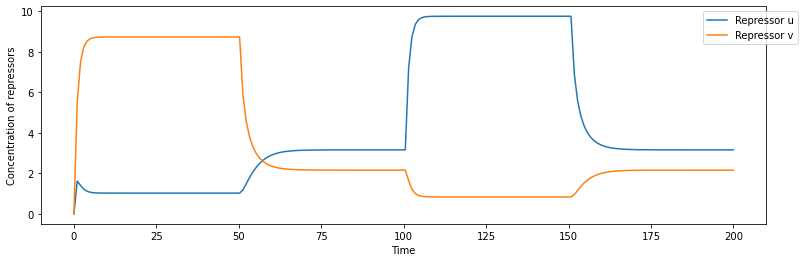

In [7]:
t= np.linspace(0, 50, 50)
#    Iv, Iu = y
#application of Iu for 50 time units (set Iu=100 and Iv=0)
params = np.array([0, 100])
yi_1= np.array([0, 0])
y1= odeint(genetic_switch, yi_1, t, args= (params,))
#remove Iu for another 50 time units
params = np.array([0, 0])
yi_2= y1[49]
y2= odeint(genetic_switch, yi_2, t, args= (params,))
#Iv for 50 time units (set Iu=0 and Iv=100)
params = np.array([100, 0])
yi_3= y2[49]
y3= odeint(genetic_switch, yi_3, t, args= (params,))
#remove Iv for another 50 time units. 
params = np.array([0, 0])
yi_4= y3[49]
y4= odeint(genetic_switch, yi_4, t, args= (params,))

Y1 = np.concatenate((y1[:,0], y2[:,0], y3[:,0], y4[:,0]), axis=0)
Y2 = np.concatenate((y1[:,1], y2[:,1], y3[:,1], y4[:,1]), axis=0)
t_full= np.linspace(0, 200, 200)
plt.figure(figsize=(13,4))
plt.xlabel("Time")
plt.ylabel("Concentration of repressors")
plt.plot(t_full, Y1, label="Repressor u")
plt.plot(t_full, Y2, label="Repressor v")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

**Explanation**

Similarly to before, increased levels of inducer $I_{u}$ results in levels of repressor u to increase to its steady-state (t0 to t50). However, hysteresic behaviour is no longer observed once the inducer is removed from the system (t50 to t100). The two repressors inhibit each other and both reach a stable state (when at equilibrium). As inducer $I_{v}$ is added to the system, repressor u reaches its steady state and repressor v levels decrease even further (t100 to 150). After the second inducer is removed, both repressor concentratrions reach a stable level once again and history-depedent behaviour is not observed. This phenomenom could be explained by the system having lost its cooperativity when the hill numbers are decreased to one and thus is no longer bistable.

**Question 1.3**
Determine the nullclines of the model system. To investigate the stability of the fixed points, plot the nullclines on the same graph with u on the x-axis and v on the y-axis and for Iu=Iv=0. Picking 10 initial conditions for u and v, use odeint to determine their time evolution and plot the trajectories on the same graph as your nullclines. You can use the alpha option in plt.plot to increase the transparency of the plotted trajectory. Mark the start and the end points of each trajectory with a point. Explain which fixed points are stable and, from the trajectories you plotted, why.

In [8]:
au = 10
av = 9
K = 3 
n = 2
b = 2 
Iu=0
Iv=0

In [9]:
u= np.linspace(0, 10, 10)
v= np.linspace(0, 10, 10)

#Equations of the nullclines
V=av/(1+(u/(1+Iu/K)**n)**b)
U=au/(1+(v/(1+Iv/K)**n)**b)

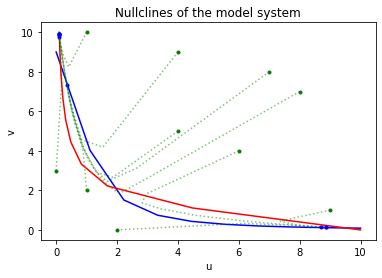

In [14]:
plt.plot(v,V, 'b')
plt.plot(U,u,'r')

plt.ylabel('v')
plt.xlabel('u')
initial_v = [0, 1, 4, 8, 1, 7, 9, 2, 4, 6]
initial_u = [3, 2, 5, 7, 10, 8, 1, 0, 9, 4]
for (x,y) in zip(initial_u,initial_v):
    params= np.array([0, 0])
    yi=np.array([x,y])
    t= np.linspace(0, 10, 10)
    y1= odeint(genetic_switch, yi, t, args= (params,))
    #plotting the trajectories with their beggining and end points
    plt.plot(y1[:,1], y1[:,0], 'g:', alpha = 0.5)
    plt.plot(y1[0,1], y1[0,0], 'g.')
    plt.plot(y1[-1,1], y1[-1,0], 'b.')
plt.title("Nullclines of the model system")
plt.show()

**Explanation**

The steady states are where the nullclines intercept. In this model, three steady states can be observed. From the trajectories plotted, it can be concluded that the second steady state is unstable and the other two are stable. This is seen from the trajectories of the initial values converging towards either the first or the third intercept of the nullclines. These stable steady states are stable nodes that attract systems. As for the unstable steady state (saddle node), it repells systems away from its node. 

**Question 1.4**
Determining the bifurcation diagram for a bistable system is another way to demonstrate that the system exhibits hysteresis. Assume that the gene coding u is positively controlled by another transcription factor. Increasing the concentration of this transcription factor will increase the parameter au in the equation for du∕dt. We will assume that the concentration of transcription factor changes only slowly and that the system reaches steady-state before the concentration of transcription factor changes again. Write code to increase au from 0 to 35, and find the steady-state value of u for each value of au using the steady-state values of u and v for the previous value of au as the initial conditions for the current value of au. Now decrease au from 35 to 0 using, as before, the steady-state values for the previous au as the initial values for the new value of au. You can use the np.linspace command to set the values of au. Plot on the same graph the steady-state value of u against au when au is increased and when au is decreased. Explain what you see. Is there a range of values for au for which the switch once thrown on cannot be reset?

In [49]:
av = 9
K = 3 
n = 2
b = 2 
def genetic_switch2(y, t, params):
    Iv, Iu, au = params
    u, v = y
    dydt= np.empty(len(y))
    dydt[0]= -u + au/(1+(v/(1+Iv/K)**n)**b)
    dydt[1]= -v + av/(1+(u/(1+Iu/K)**n)**b)
    return dydt

In [50]:
#when au is increased
au = np.linspace(0, 35, 35)
t = np.linspace(0, 100, 50)
u_steady = []
v_steady = []
u = 0
v = 0
for i in au:
    params= np.array([0, 0, i])
    if len(u_steady) == 0:
        yi=np.array([u,v])
        y1= odeint(genetic_switch2, yi, t, args= (params, ))
        u_steady.append(y1[49][0])
        v_steady.append(y1[49][1])
    else:
        yi=np.array([u_steady[-1],v_steady[-1]])
        y1= odeint(genetic_switch2, yi, t, args= (params, ))
        u_steady.append(y1[49][0])
        v_steady.append(y1[49][1])

In [54]:
#when au is decreased
au_reversed = np.linspace(35, 0, 35)
t = np.linspace(0, 100, 50)
u_steady_rev = []
v_steady_rev = []
u = 0
v = 0
for i in au_reversed:
    params= np.array([0, 0, i])
    if len(u_steady_rev) == 0:
        yi=np.array([u,v])
        y1= odeint(genetic_switch2, yi, t, args= (params, ))
        u_steady_rev.append(y1[49][0])
        v_steady_rev.append(y1[49][1])
    else:
        yi=np.array([u_steady_rev[-1],v_steady_rev[-1]])
        y1= odeint(genetic_switch2, yi, t, args= (params, ))
        u_steady_rev.append(y1[49][0])
        v_steady_rev.append(y1[49][1])

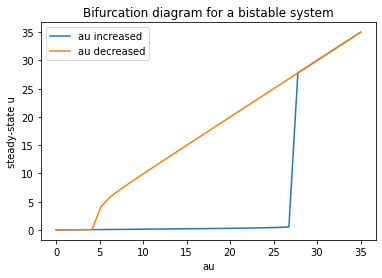

In [21]:
plt.figure()
plt.plot(au, u_steady, label="au increased")
plt.plot(au_reversed, u_steady_rev, label="au decreased")
plt.xlabel("au")
plt.ylabel("steady-state u")
plt.title("Bifurcation diagram for a bistable system")
plt.legend()
plt.show()

**Explanation**

The value of the birfucation parameter at which the switch once thrown on cannot be reset is history-dependent. As this is a bistable system, the threshold value for a system previously in a high-state will be different to the threshold value of a system in a low-state. This can be observed from the plot. The threshold value at which u jumps to a steady state is found at values $a_{u}$ above 27 when the system was at first in a low state ($a_{u}$ increasing). When the system starts from a high-state, the threshold value to bring the system back to zero is found at $a_{u}$ values below 4. Therefore, the range of values $a_{u}$ for which the switch once thrown cannot be reset are between 28 and 35.

### A genetic oscillator

Elowitz and Leibler were the first people to construct a synthetic genetic oscillator. They added three genes to E. coli: the first gene repressed the second; the second gene repressed the third; and the third gene repressed the first.

**Question 2.1** 
Explain why this system has negative feedback.

This system has negative feedback as an increase in one of the output of the loop will result in the system acting to decrease that output. Therefore if the level of the first protein in this system would be to be increased, it would lead to a decrease in the second, which would cause an increase in the third, and finally a decrease in the first.

**Question 2.2**
In the model used by Elowitz and Leibler to design their system, transcription for each gene is described as

\begin{equation*}
\frac{dm_{i}}{dt}=-m_{i}+ \frac{a}{1+p_{i-1}^2}
\end{equation*}

where mi is the mRNA of the i'th gene and pi is the repressor encoded by that mRNA. For example, transcription of the second gene is repressed by the protein transcribed from the first gene with this repression described by a Hill function with a Hill number of 2. Time is given in units of the mRNA lifetime, and a is the maximum number of mRNAs transcribed per unit time. Both the mRNA lifetime and a are assumed to be the same for all three genes, and note that p0 is understood to mean p3. Translation and protein degradation are modelled as

\begin{equation*}
\frac{dp_{i}}{dt}=-b(p_{i}-m_{i})
\end{equation*}
where b is the ratio of mRNA to protein lifetimes.

In [23]:
def genetic_oscillator(y, t, params):
    a,b = params
    m1, m2, m3, p1, p2, p3 = y
    dydt=np.empty(len(y))
    dydt[0]= -m1 + a/(1+(p3**2))
    dydt[1] = -m2 + a/(1+(p1**2))
    dydt[2] = -m3 + a/(1+(p2**2))
    dydt[3] = -b*(p1-m1)
    dydt[4] = -b*(p2-m2)
    dydt[5] = -b*(p3-m3)
    return dydt

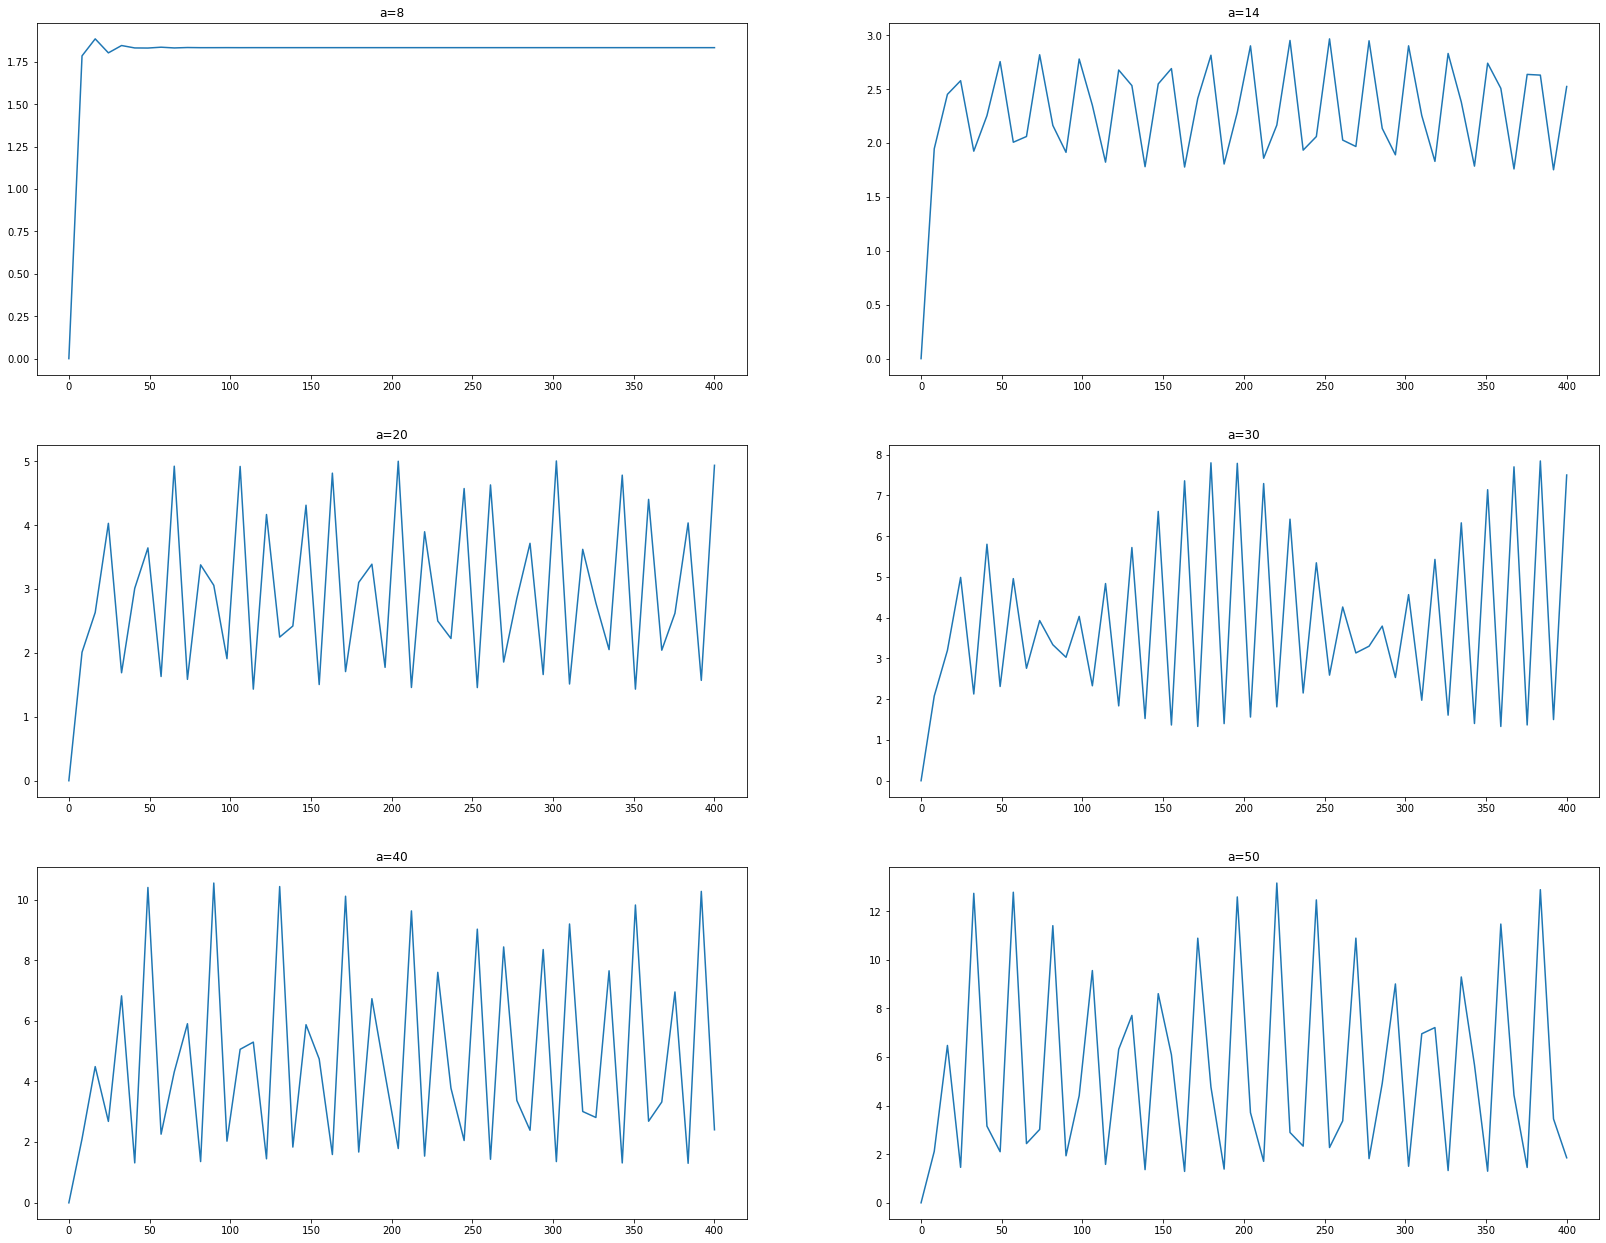

In [44]:
#initial conditions- at least one of the repressors (p) must be +ve
y0 = np.array([1, 1.1, 1.2, 0, 1, 0])

#Plot1
params1= np.array([8,10])
p1=odeint(genetic_oscillator, y0, t, args=(params1,))

#Plot2
params2= np.array([14,10])
p2=odeint(genetic_oscillator, y0, t, args=(params2,))

#Plot3
params3= np.array([20,10])
p3=odeint(genetic_oscillator, y0, t, args=(params3,))

#Plot4
params4= np.array([30,10])
p4=odeint(genetic_oscillator, y0, t, args=(params4,))

#Plot5
params5= np.array([40,10])
p5=odeint(genetic_oscillator, y0, t, args=(params5,))

#Plot6
params6= np.array([50,10])
p6=odeint(genetic_oscillator, y0, t, args=(params6,))

plt.figure(figsize=(28,22))
#plot1
plt.subplot(3, 2, 1)
plt.plot(t, p1[:,3])
plt.title('a=8')

#plot2
plt.subplot(3, 2, 2)
plt.plot(t, p2[:,3])
plt.title('a=14')

#plot3
plt.subplot(3, 2, 3)
plt.plot(t, p3[:,3])
plt.title('a=20')

#plot4
plt.subplot(3, 2, 4)
plt.plot(t, p4[:,3])
plt.title('a=30')

#plot5
plt.subplot(3, 2, 5)
plt.plot(t, p5[:,3])
plt.title('a=40')

#plot6
plt.subplot(3, 2, 6)
plt.plot(t, p6[:,3])
plt.title('a=50')
plt.show()